## Keras Neural Net Sequential Model
In order to test an algorithm capable of GPU/CPU support and deep learning models, we've begun exploring building a neural net with the Keras library. This notebook will catalog these experiements. The following code uses the 

In [1]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
import keras
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Flatten
import numpy as np
from sklearn import preprocessing
from keras import regularizers
from keras.utils import np_utils, generic_utils

Using TensorFlow backend.


Start building the network. Currently 5 hidden layers, with 100 nodes.

In [2]:
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=90))
model.add(Dense(units=100, activation='relu', kernel_regularizer=regularizers.l2(0.00001)))
model.add(Dense(units=100, activation='relu', kernel_regularizer=regularizers.l2(0.00001)))
model.add(Dense(units=100, activation='relu', kernel_regularizer=regularizers.l2(0.00001)))
model.add(Dense(units=100, activation='relu'))
#model.add(Flatten())
model.add(Dense(units=2011, activation='softmax'))


Model parameters: Using categorical_crossentropy and stochastic gradient descent

In [3]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

Getting the data: initial split is as follows--10,000 training exampes and 1,000 test examples

In [4]:
labels = []
examples = []
print "GETTING DATASET"
print
# Replace filename with the path to the CSV where you have the year predictions data saved.
filename = "/mnt/c/Users/Aumit/Desktop/YearPredictionMSD.txt/yp.csv"
with open(filename, 'r') as f:
    for line in f:
        content = line.split(",")
        
        labels.append(content[0])

        content.pop(0)

        # If we wanted pure lists
        #content = [float(elem) for elem in content]
        #content = map(float, content)

        # If we want a list of numpy arrays, not necessary
        #npa = np.asarray(content, dtype=np.float64)

        examples.append(content)

print "SPLITTING TRAINING AND TEST SETS"
print 
# Turning lists into numpy arrays
total_array = np.array(examples)

# Scale the features so they have 0 mean
total_scaled = preprocessing.scale(total_array)

# Numpy array of the labels 
total_labels = np.array(labels)
# 
# Split training and test:
# Increase or decrease these sizes
# Currently using first 10000 examples as training data
# Last 1000 as test data
training_examples = total_scaled[:10000]
#training_examples = random.sample(total_array, 10)
training_labels = total_labels[:10000]

# Use the following 1000 examples as text examples
test_examples = total_scaled[10000:11000]
test_labels = total_labels[10000:11000]

GETTING DATASET

SPLITTING TRAINING AND TEST SETS



/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype |S12 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In order for our labels to work with keras, we need to conver them via the to_categorical function. As of right now, we have 2011 classes (years 0 -> 2011). This means our label vectors have a lot of 0's for all the years it doesn't have.

In [6]:
y_train = keras.utils.to_categorical(training_labels, num_classes=2011)

y_test = keras.utils.to_categorical(test_labels, num_classes=2011)

Now we train our model! 

In [7]:
model.fit(training_examples, y_train, epochs=100, batch_size=32)

Epoch 1/100
10000/10000 [==============================] - 6s 563us/step - loss: 5.6850 - acc: 0.0629
Epoch 2/100
10000/10000 [==============================] - 6s 632us/step - loss: 3.5141 - acc: 0.0675
Epoch 3/100
10000/10000 [==============================] - 5s 529us/step - loss: 3.4368 - acc: 0.0733
Epoch 4/100
10000/10000 [==============================] - 5s 502us/step - loss: 3.4071 - acc: 0.0707
Epoch 5/100
10000/10000 [==============================] - 5s 508us/step - loss: 3.3789 - acc: 0.0731
Epoch 6/100
10000/10000 [==============================] - 5s 514us/step - loss: 3.3592 - acc: 0.0776
Epoch 7/100
10000/10000 [==============================] - 5s 511us/step - loss: 3.3424 - acc: 0.0775
Epoch 8/100
10000/10000 [==============================] - 5s 512us/step - loss: 3.3223 - acc: 0.0749
Epoch 9/100
10000/10000 [==============================] - 5s 513us/step - loss: 3.2979 - acc: 0.0851
Epoch 10/100
10000/10000 [==============================] - 5s 511us/step - loss: 

For the sake of time, we only did 100 epochs so training accuracy only reached 59%, but with 200 epochs (and the same number of training exmaples) we reach 99.99% training accuracy.

In [9]:
loss_and_metrics = model.evaluate(training_examples, y_train, batch_size=32)
print loss_and_metrics

10000/10000 [==============================] - 2s 168us/step
[1.1825393805980682, 0.65100000000000002]


Note: We have confirmed that the model is able to overfit (we weren't able to achieve this result with scikit-learn. Our next steps should focus on how to address overfitting, i.e, looking at regularization and adding more data.

In [3]:
training_examples = total_scaled[:30000]
#training_examples = random.sample(total_array, 10)
training_labels = total_labels[:30000]

test_examples = total_scaled[30000:31000]
test_labels = total_labels[30000:31000]

y_train = keras.utils.to_categorical(training_labels, num_classes=2011)

y_test = keras.utils.to_categorical(test_labels, num_classes=2011)

Define our new network architecture: 4 hidden units, and lambda = 0.000001 in each hidden layer.

In [4]:
model_1 = Sequential()
model_1.add(Dense(units=100, activation='relu', input_dim=90))
model_1.add(Dense(units=100, activation='relu', kernel_regularizer=regularizers.l2(0.00001)))
model_1.add(Dense(units=100, activation='relu', kernel_regularizer=regularizers.l2(0.00001)))
model_1.add(Dense(units=100, activation='relu', kernel_regularizer=regularizers.l2(0.00001)))
model_1.add(Dense(units=100, activation='relu', kernel_regularizer=regularizers.l2(0.00001)))
model_1.add(Dense(units=100, activation='relu', kernel_regularizer=regularizers.l2(0.00001)))
model_1.add(Dense(units=50, activation='relu', kernel_regularizer=regularizers.l2(0.00001)))
model_1.add(Dense(units=50, activation='relu'))
#model.add(Flatten())
model_1.add(Dense(units=2011, activation='softmax'))

In [5]:
model_1.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [6]:
model_1.fit(training_examples, y_train, epochs=200, batch_size=32)

Epoch 1/200
30000/30000 [==============================] - 16s 544us/step - loss: 5.2672 - acc: 0.0656
Epoch 2/200
30000/30000 [==============================] - 17s 564us/step - loss: 3.4808 - acc: 0.0680
Epoch 3/200
30000/30000 [==============================] - 12s 402us/step - loss: 3.4410 - acc: 0.0683
Epoch 4/200
30000/30000 [==============================] - 13s 422us/step - loss: 3.4181 - acc: 0.0687
Epoch 5/200
30000/30000 [==============================] - 12s 409us/step - loss: 3.3984 - acc: 0.0720
Epoch 6/200
30000/30000 [==============================] - 13s 429us/step - loss: 3.3814 - acc: 0.0722
Epoch 7/200
30000/30000 [==============================] - 13s 432us/step - loss: 3.3632 - acc: 0.0704
Epoch 8/200
30000/30000 [==============================] - 13s 424us/step - loss: 3.3343 - acc: 0.0742
Epoch 9/200
30000/30000 [==============================] - 13s 429us/step - loss: 3.2974 - acc: 0.0791
Epoch 10/200
30000/30000 [==============================] - 13s 423us/ste

30000/30000 [==============================] - 14s 478us/step - loss: 1.6084 - acc: 0.4743
Epoch 158/200
30000/30000 [==============================] - 14s 469us/step - loss: 1.6328 - acc: 0.4718
Epoch 159/200
30000/30000 [==============================] - 14s 482us/step - loss: 1.5992 - acc: 0.4803
Epoch 160/200
30000/30000 [==============================] - 14s 462us/step - loss: 1.5946 - acc: 0.4832
Epoch 161/200
30000/30000 [==============================] - 12s 399us/step - loss: 1.5819 - acc: 0.4872
Epoch 162/200
30000/30000 [==============================] - 12s 414us/step - loss: 1.5772 - acc: 0.4878
Epoch 163/200
30000/30000 [==============================] - 20s 680us/step - loss: 1.5802 - acc: 0.4905
Epoch 164/200
30000/30000 [==============================] - 14s 461us/step - loss: 1.5866 - acc: 0.4879
Epoch 165/200
30000/30000 [==============================] - 16s 527us/step - loss: 1.5587 - acc: 0.4939
Epoch 166/200
30000/30000 [==============================] - 14s 453u

In [7]:
loss_and_metrics = model_1.evaluate(training_examples, y_train, batch_size=32)
print loss_and_metrics

30000/30000 [==============================] - 5s 154us/step
[1.4454273156642914, 0.55000000000000004]


Thus, this current network architecture gives us a 55% accuracy on the test set-- a major improvement from the single digit percentages we were getting with scikit-learn. This may be a function of having more control over the structure of a kera's model as opposed to a scikit-learn model. This also a major improvement over the 7% accuracy we got on the test set with less training data, and a less complex network architecture.

In [8]:
history = model_1

In [10]:
history = model_1

Let's observe performance on via some plots. We will look at the performance of our original model first. This model has 4 hidden units, each with 100 hidden layers. It is being trained on 9000 examples, and validated against 1000 examples.

In [5]:
examples = total_scaled[:10000]
#training_examples = random.sample(total_array, 10)
labels = total_labels[:10000]
y_labels = keras.utils.to_categorical(labels, num_classes=2011)

In [6]:
history = model.fit(examples, y_labels, validation_split=0.1, epochs=100, batch_size=32)

Train on 9000 samples, validate on 1000 samples
Epoch 1/100
9000/9000 [==============================] - 5s 581us/step - loss: 6.2548 - acc: 0.0634 - val_loss: 4.2501 - val_acc: 0.0900
Epoch 2/100
9000/9000 [==============================] - 5s 533us/step - loss: 3.5748 - acc: 0.0654 - val_loss: 3.5275 - val_acc: 0.0300
Epoch 3/100
9000/9000 [==============================] - 5s 565us/step - loss: 3.4671 - acc: 0.0712 - val_loss: 3.6483 - val_acc: 0.0670
Epoch 4/100
9000/9000 [==============================] - 5s 558us/step - loss: 3.4301 - acc: 0.0766 - val_loss: 3.4098 - val_acc: 0.0400
Epoch 5/100
9000/9000 [==============================] - 5s 549us/step - loss: 3.4021 - acc: 0.0734 - val_loss: 3.3899 - val_acc: 0.1040
Epoch 6/100
9000/9000 [==============================] - 5s 559us/step - loss: 3.3832 - acc: 0.0752 - val_loss: 3.5745 - val_acc: 0.0300
Epoch 7/100
9000/9000 [==============================] - 5s 556us/step - loss: 3.3551 - acc: 0.0806 - val_loss: 3.2978 - val_acc: 

9000/9000 [==============================] - 5s 578us/step - loss: 2.1750 - acc: 0.3567 - val_loss: 4.2724 - val_acc: 0.0940
Epoch 61/100
9000/9000 [==============================] - 4s 483us/step - loss: 2.1564 - acc: 0.3649 - val_loss: 4.1647 - val_acc: 0.0830
Epoch 62/100
9000/9000 [==============================] - 5s 548us/step - loss: 2.1343 - acc: 0.3690 - val_loss: 4.1808 - val_acc: 0.0690
Epoch 63/100
9000/9000 [==============================] - 5s 515us/step - loss: 2.1012 - acc: 0.3776 - val_loss: 4.3792 - val_acc: 0.0800
Epoch 64/100
9000/9000 [==============================] - 5s 516us/step - loss: 2.0770 - acc: 0.3904 - val_loss: 4.4149 - val_acc: 0.0730
Epoch 65/100
9000/9000 [==============================] - 4s 497us/step - loss: 2.0515 - acc: 0.3957 - val_loss: 4.7039 - val_acc: 0.0770
Epoch 66/100
9000/9000 [==============================] - 5s 505us/step - loss: 2.0352 - acc: 0.4020 - val_loss: 4.3833 - val_acc: 0.1030
Epoch 67/100
9000/9000 [=======================

In [7]:
history.history.keys()

['acc', 'loss', 'val_acc', 'val_loss']

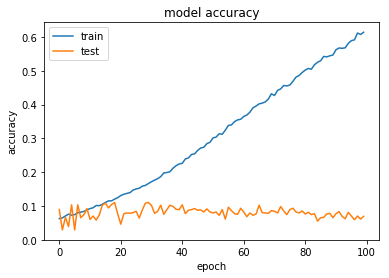

In [8]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

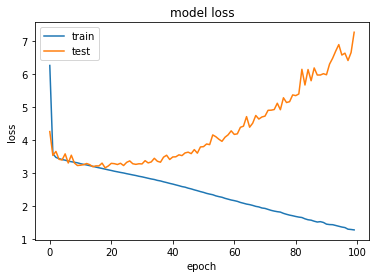

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

From the above plots, it's obvious that this model underperforms because it of high variance as well as a low amount of data. In high variance settings, it is helpful to increase the amount of training data. Let's test this idea out with 30000 training examples next.